## Is NYCT_4588 on Schedule??
# If not, how much delay is expected?
# On what days are the delay expected?
# which hours of the day delay is expected?

In [297]:
import plotly
import pandas
#import plotly.express as px
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns

import descartes
sns.set(style="ticks", color_codes=True)
plt.style.use('seaborn-whitegrid')




#import pandas_bokeh
#pandas_bokeh.output_notebook()
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

In [13]:
df = pd.read_csv("MTA-1706.csv")
print("The dataframe has :",df.shape)

The dataframe has : (1048575, 18)


C:\Users\Suhasini\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
df.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation.Latitude',
       'VehicleLocation.Longitude', 'NextStopPointName',
       'ArrivalProximityText', 'DistanceFromStop', 'ExpectedArrivalTime',
       'ScheduledArrivalTime', 'Unnamed: 17'],
      dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
RecordedAtTime               1048575 non-null object
DirectionRef                 1048575 non-null int64
PublishedLineName            1048575 non-null object
OriginName                   1040112 non-null object
OriginLat                    1040112 non-null float64
OriginLong                   1040112 non-null float64
DestinationName              1048575 non-null object
DestinationLat               1047329 non-null float64
DestinationLong              1047329 non-null float64
VehicleRef                   1048575 non-null object
VehicleLocation.Latitude     1048575 non-null float64
VehicleLocation.Longitude    1048575 non-null float64
NextStopPointName            1047439 non-null object
ArrivalProximityText         1047439 non-null object
DistanceFromStop             1047439 non-null object
ExpectedArrivalTime          931342 non-null object
ScheduledArrivalTime         102290

In [15]:
df.drop(['Unnamed: 17'], axis=1,inplace=True)

In [51]:
## is B6 running on Schedule
B6 = df[df.PublishedLineName == 'B6']

In [367]:
B6.head(5)

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
7040,2017-06-01 03:03:00,1,B6,LIVONIA AV/ASHFORD ST,40.666382,-73.883614,BENSONHURST HARWAY AV,40.592949,-73.993385,NYCT_7186,40.632639,-73.952826,BEDFORD AV/CAMPUS ROAD,approaching,74,2017-06-01 03:03:00,3:02:27
7041,2017-06-01 03:03:00,1,B6,LIVONIA AV/ASHFORD ST,40.666382,-73.883614,BENSONHURST HARWAY AV,40.592949,-73.993385,NYCT_7186,40.632639,-73.952826,BEDFORD AV/CAMPUS ROAD,approaching,74,2017-06-01 03:03:00,3:00:27
7115,2017-06-01 03:03:00,0,B6,HARWAY AV/BAY 37 ST,40.593510,-73.993996,EAST NY NEW LOTS STA,40.666420,-73.883385,NYCT_7145,40.596991,-73.998363,CROPSEY AV/BAY 31 ST,at stop,0,2017-06-01 03:03:00,3:01:14
7139,2017-06-01 03:03:00,0,B6,HARWAY AV/BAY 37 ST,40.593510,-73.993996,EAST NY NEW LOTS STA,40.666420,-73.883385,NYCT_7162,40.632994,-73.925987,AV H/E 52 ST,at stop,0,NaT,2:58:44
7140,2017-06-01 03:03:00,0,B6,HARWAY AV/BAY 37 ST,40.593510,-73.993996,EAST NY NEW LOTS STA,40.666420,-73.883385,NYCT_7162,40.632994,-73.925987,AV H/E 52 ST,at stop,0,NaT,2:57:44


In [56]:
#change to datetime datadtype
B6.RecordedAtTime = pd.to_datetime(B6.RecordedAtTime)
B6.ExpectedArrivalTime = pd.to_datetime(B6.ExpectedArrivalTime)
#B6.ScheduledArrivalTime = pd.to_datetime(B6.ScheduledArrivalTime)

C:\Users\Suhasini\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [57]:
print("The length of dataframe before excluding midnight hours  : ", len(B6))

The length of dataframe before excluding midnight hours  :  19825


In [58]:
## exclude midnight hours
time_mask = (B6['RecordedAtTime'].dt.hour >= 3) & (B6['RecordedAtTime'].dt.hour < 23)
B6 = B6[time_mask]
print("The Bus B6 has " , len(B6) , " rows after exlcuding midnight hours")

The Bus B6 has  18862  rows after exlcuding midnight hours


In [363]:
B6.groupby(['VehicleRef','OriginName','DestinationName'])['VehicleRef'].count()

VehicleRef  OriginName                         DestinationName          
NYCT_4855   AV J/CONEY ISLAND AV               ROCK PKY STA                   5
            BEDFORD AV/CAMPUS ROAD             BENSONHURST HARWAY AV          4
            HARWAY AV/BAY 37 ST                EAST NY NEW LOTS STA           6
                                               LTD EAST NY NEW LOTS STA      73
                                               ROCK PKY STA                  22
            LIVONIA AV/ASHFORD ST              BENSONHURST HARWAY AV         11
                                               LTD BENSONHURST HARWAY AV     58
            ROCKAWAY STATION/ROCKAWAY STATION  AVENUE J CONEY IS AV           3
                                               BENSONHURST HARWAY AV         20
NYCT_4856   AV J/CONEY ISLAND AV               ROCK PKY STA                   7
            HARWAY AV/BAY 37 ST                LTD EAST NY NEW LOTS STA      74
                                               

In [72]:
seaborn.catplot(x="OriginName", y=B6.groupby(['OriginName','DestinationName'])['VehicleRef'].count(), hue="DestinationName", kind="swarm", data=B6);

NameError: name 'seaborn' is not defined

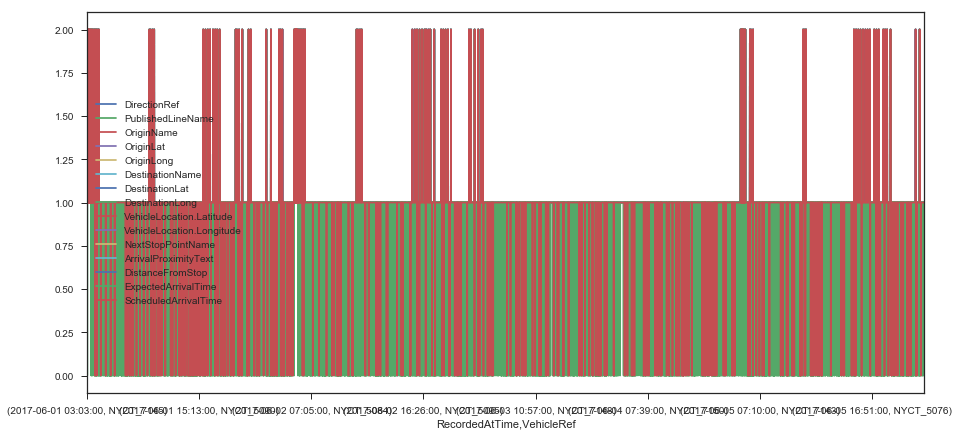

In [73]:
fig, ax = plt.subplots(figsize=(15,7))
B6.groupby(['RecordedAtTime','VehicleRef']).count().plot(ax=ax)

In [302]:
B6_NYCT4855 = B6[B6.VehicleRef == 'NYCT_4855']

In [303]:
B6_NYCT4855

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
16856,2017-06-01 06:13:00,0,B6,HARWAY AV/BAY 37 ST,40.593510,-73.993996,LTD EAST NY NEW LOTS STA,40.666420,-73.883385,NYCT_4855,40.596962,-73.998329,CROPSEY AV/BAY 31 ST,at stop,4,2017-06-01 06:13:00,6:11:04
18447,2017-06-01 06:24:00,0,B6,HARWAY AV/BAY 37 ST,40.593510,-73.993996,LTD EAST NY NEW LOTS STA,40.666420,-73.883385,NYCT_4855,40.615230,-73.979986,BAY PY/62 ST,approaching,80,2017-06-01 06:24:00,6:24:18
20201,2017-06-01 06:33:00,0,B6,HARWAY AV/BAY 37 ST,40.593510,-73.993996,LTD EAST NY NEW LOTS STA,40.666420,-73.883385,NYCT_4855,40.625681,-73.956832,AV J/OCEAN AV,approaching,54,2017-06-01 06:34:00,6:35:45
22143,2017-06-01 06:43:00,0,B6,HARWAY AV/BAY 37 ST,40.593510,-73.993996,LTD EAST NY NEW LOTS STA,40.666420,-73.883385,NYCT_4855,40.633969,-73.948222,GLENWOOD RD/NOSTRAND AV,approaching,33,2017-06-01 06:44:00,6:45:00
24285,2017-06-01 06:54:00,0,B6,HARWAY AV/BAY 37 ST,40.593510,-73.993996,LTD EAST NY NEW LOTS STA,40.666420,-73.883385,NYCT_4855,40.633090,-73.924471,RALPH AV/GLENWOOD RD,< 1 stop away,576,2017-06-01 06:56:00,6:56:35
26636,2017-06-01 07:03:00,0,B6,HARWAY AV/BAY 37 ST,40.593510,-73.993996,LTD EAST NY NEW LOTS STA,40.666420,-73.883385,NYCT_4855,40.639831,-73.906594,FLATLANDS AV/REMSEN AV,approaching,52,2017-06-01 07:03:00,7:03:12
29201,2017-06-01 07:13:00,0,B6,HARWAY AV/BAY 37 ST,40.593510,-73.993996,LTD EAST NY NEW LOTS STA,40.666420,-73.883385,NYCT_4855,40.652190,-73.891588,COZINE AV/ALABAMA AV,< 1 stop away,215,2017-06-01 07:14:00,7:12:42
31890,2017-06-01 07:24:00,0,B6,HARWAY AV/BAY 37 ST,40.593510,-73.993996,LTD EAST NY NEW LOTS STA,40.666420,-73.883385,NYCT_4855,40.664390,-73.881296,LIVONIA AV/ASHFORD ST,< 1 stop away,350,2017-06-01 07:25:00,7:23:00
34770,2017-06-01 07:33:00,1,B6,LIVONIA AV/ASHFORD ST,40.666382,-73.883614,LTD BENSONHURST HARWAY AV,40.592949,-73.993385,NYCT_4855,40.666304,-73.883716,ASHFORD ST/NEW LOTS AV,< 1 stop away,168,2017-06-01 07:34:00,7:33:55
37772,2017-06-01 07:43:00,1,B6,LIVONIA AV/ASHFORD ST,40.666382,-73.883614,LTD BENSONHURST HARWAY AV,40.592949,-73.993385,NYCT_4855,40.657725,-73.878999,COZINE AV/JEROME ST,approaching,44,2017-06-01 07:44:00,7:39:49


In [304]:
## Calculate delay in seconds then add it as another column in B6
expected_hours  = B6_NYCT4855.ExpectedArrivalTime.dt.hour
expected_minutes = B6_NYCT4855.ExpectedArrivalTime.dt.minute
expected_seconds = B6_NYCT4855.ExpectedArrivalTime.dt.second

In [305]:
scheduled_hours = B6_NYCT4855.ScheduledArrivalTime.str.split(':').str[-3].astype(float)
scheduled_minutes = B6_NYCT4855.ScheduledArrivalTime.str.split(':').str[-2].astype(float)
scheduled_seconds = B6_NYCT4855.ScheduledArrivalTime.str.split(':').str[-1].astype(float)

In [306]:
B6_NYCT4855['VehicleDelay'] = 3600 *(expected_hours - scheduled_hours) +60 * (expected_minutes - scheduled_minutes) +(expected_seconds - scheduled_seconds)

C:\Users\Suhasini\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [307]:
B6_NYCT4855['day_of_week'] = B6_NYCT4855['RecordedAtTime'].dt.weekday_name

C:\Users\Suhasini\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [308]:
B6_NYCT4855.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 16856 to 883970
Data columns (total 19 columns):
RecordedAtTime               202 non-null datetime64[ns]
DirectionRef                 202 non-null int64
PublishedLineName            202 non-null object
OriginName                   202 non-null object
OriginLat                    202 non-null float64
OriginLong                   202 non-null float64
DestinationName              202 non-null object
DestinationLat               202 non-null float64
DestinationLong              202 non-null float64
VehicleRef                   202 non-null object
VehicleLocation.Latitude     202 non-null float64
VehicleLocation.Longitude    202 non-null float64
NextStopPointName            202 non-null object
ArrivalProximityText         202 non-null object
DistanceFromStop             202 non-null object
ExpectedArrivalTime          181 non-null datetime64[ns]
ScheduledArrivalTime         198 non-null object
VehicleDelay                 181 n

In [309]:
#B6_NYCT4855.fillna(0,inplace = True)
## replace NAN values with mean of the column value....

B6_NYCT4855['VehicleDelay'].fillna((B6_NYCT4855['VehicleDelay'].mean()), inplace=True)


C:\Users\Suhasini\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [310]:
B6_NYCT4855.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 16856 to 883970
Data columns (total 19 columns):
RecordedAtTime               202 non-null datetime64[ns]
DirectionRef                 202 non-null int64
PublishedLineName            202 non-null object
OriginName                   202 non-null object
OriginLat                    202 non-null float64
OriginLong                   202 non-null float64
DestinationName              202 non-null object
DestinationLat               202 non-null float64
DestinationLong              202 non-null float64
VehicleRef                   202 non-null object
VehicleLocation.Latitude     202 non-null float64
VehicleLocation.Longitude    202 non-null float64
NextStopPointName            202 non-null object
ArrivalProximityText         202 non-null object
DistanceFromStop             202 non-null object
ExpectedArrivalTime          181 non-null datetime64[ns]
ScheduledArrivalTime         198 non-null object
VehicleDelay                 202 n

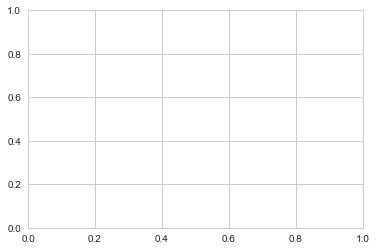

In [144]:
fig = plt.figure()
ax = plt.axes()

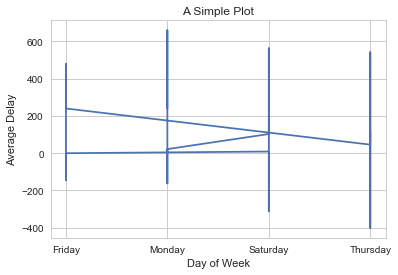

In [145]:
ax = plt.axes()
x = B6_NYCT4855.day_of_week
y=B6_NYCT4855.VehicleDelay
ax.plot(x, y)
ax.set(xlabel='Day of Week', ylabel='Average Delay',
       title='A Simple Plot');

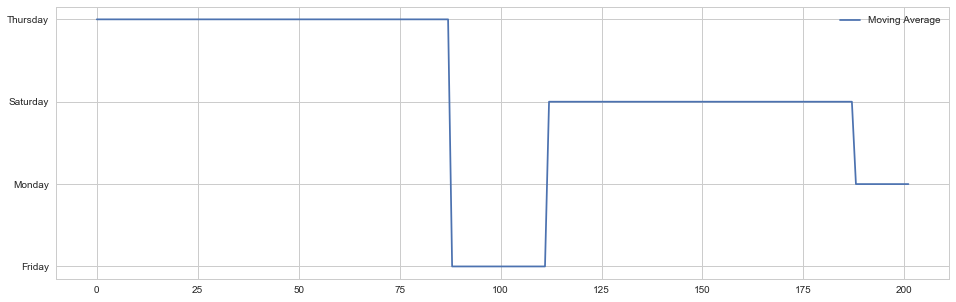

In [152]:
#test = pd.Series(B6_NYCT4855["VehicleDelay"].values, index=B6_NYCT4855["RecordedAtTime"])

#plt.plot(test, label="Original")

test = pd.Series(B6_NYCT4855["VehicleDelay"].values, index=B6_NYCT4855["day_of_week"])
plt.figure(figsize=(16,5))
plt.plot(B6_NYCT4855.day_of_week.values, label="Moving Average")
#plt.plot(exp_smoothed, label="Exponentially Weighted Average")
plt.legend()
plt.show()

In [153]:
B6_NYCT4855.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation.Latitude',
       'VehicleLocation.Longitude', 'NextStopPointName',
       'ArrivalProximityText', 'DistanceFromStop', 'ExpectedArrivalTime',
       'ScheduledArrivalTime', 'VehicleDelay', 'day_of_week'],
      dtype='object')

In [154]:
cols_of_interest = ['RecordedAtTime','OriginName','DestinationName','VehicleRef','ExpectedArrivalTime',
       'ScheduledArrivalTime', 'VehicleDelay', 'day_of_week']

In [155]:
B6_NYCT4855 = B6_NYCT4855[cols_of_interest]

In [164]:
B6_NYCT4855.tail(5)

,RecordedAtTime,OriginName,DestinationName,VehicleRef,ExpectedArrivalTime,ScheduledArrivalTime,VehicleDelay,day_of_week
872565,2017-06-05 08:40:00,ROCKAWAY STATION/ROCKAWAY STATION,BENSONHURST HARWAY AV,NYCT_4855,2017-06-05 08:41:00,8:39:10,110.0,Monday
875583,2017-06-05 08:50:00,ROCKAWAY STATION/ROCKAWAY STATION,BENSONHURST HARWAY AV,NYCT_4855,2017-06-05 08:51:00,8:49:28,92.0,Monday
878517,2017-06-05 09:00:00,ROCKAWAY STATION/ROCKAWAY STATION,BENSONHURST HARWAY AV,NYCT_4855,2017-06-05 09:01:00,8:56:48,252.0,Monday
881307,2017-06-05 09:10:00,ROCKAWAY STATION/ROCKAWAY STATION,BENSONHURST HARWAY AV,NYCT_4855,2017-06-05 09:11:00,9:06:41,259.0,Monday
883970,2017-06-05 09:20:00,ROCKAWAY STATION/ROCKAWAY STATION,BENSONHURST HARWAY AV,NYCT_4855,2017-06-05 09:21:00,9:17:00,240.0,Monday


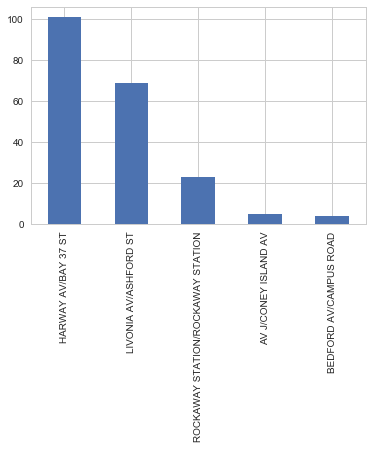

In [159]:
B6_NYCT4855['OriginName'].value_counts().plot(kind='bar') ## Harway Av/Bay 37 st seems to be pretty busy and has more frequency of buses


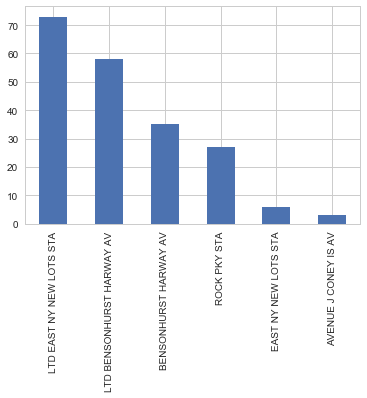

In [160]:
B6_NYCT4855['DestinationName'].value_counts().plot(kind='bar') # LTD EAST NY Net Lots STA has more frequency for buses

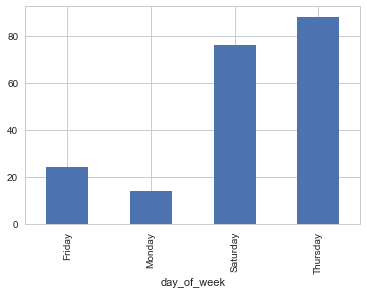

In [165]:
B6_NYCT4855.groupby('day_of_week').size().plot(kind='bar'); ## Expect bus delays on Thursday and Saturday

day_of_week
Friday      AxesSubplot(0.125,0.125;0.775x0.755)
Monday      AxesSubplot(0.125,0.125;0.775x0.755)
Saturday    AxesSubplot(0.125,0.125;0.775x0.755)
Thursday    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

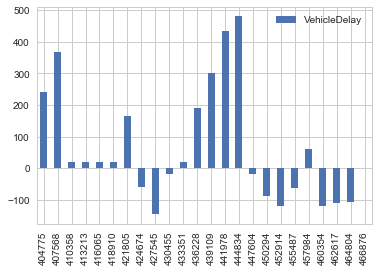

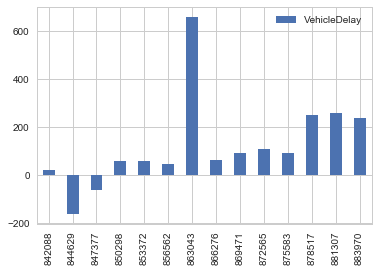

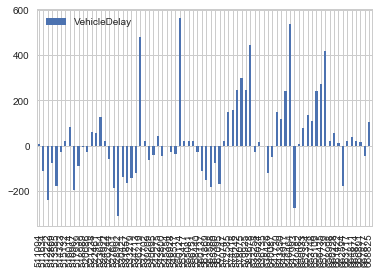

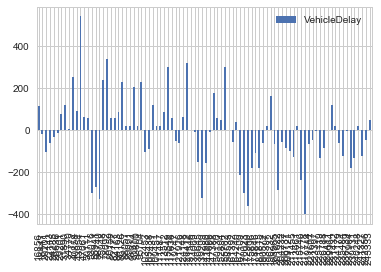

In [170]:
B6_NYCT4855.groupby('day_of_week').plot(kind='bar')

In [172]:
saturday_delay = B6_NYCT4855[B6_NYCT4855.day_of_week == 'Saturday']

VehicleRef
NYCT_4855    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

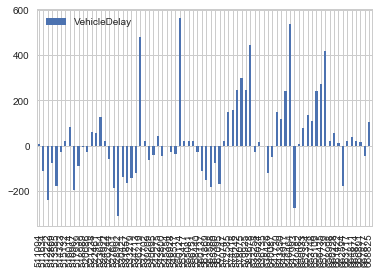

In [173]:
saturday_delay.groupby('VehicleRef').plot(kind='bar')

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)



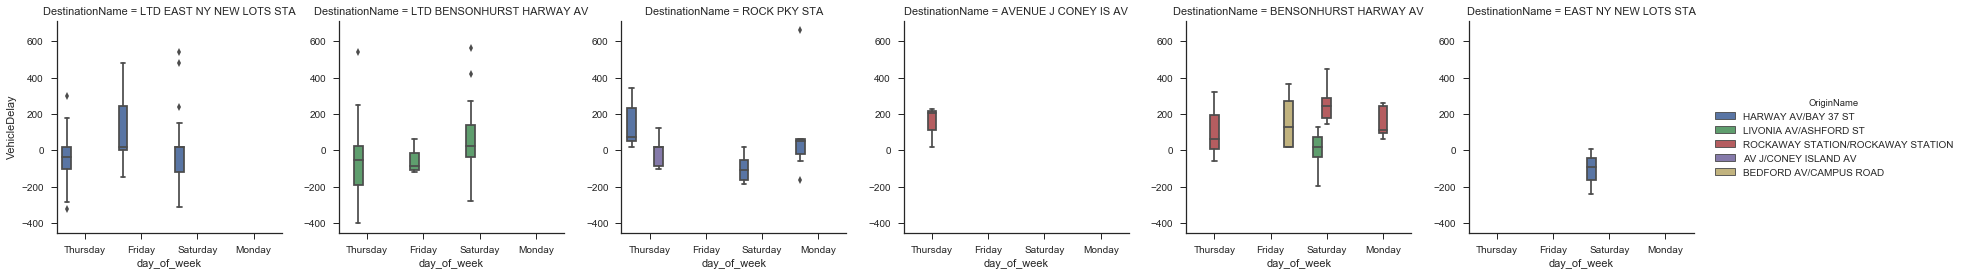

In [263]:
sns.factorplot(data=B6_NYCT4855,x='day_of_week',y='VehicleDelay',hue='OriginName',col='DestinationName',kind='box');
plt.show()

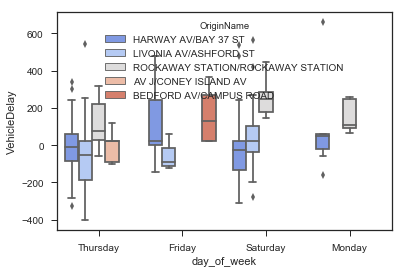

In [264]:
sns.boxplot(x="day_of_week",y="VehicleDelay",hue='OriginName',color='DestinationName',data=B6_NYCT4855, palette="coolwarm");
plt.show()

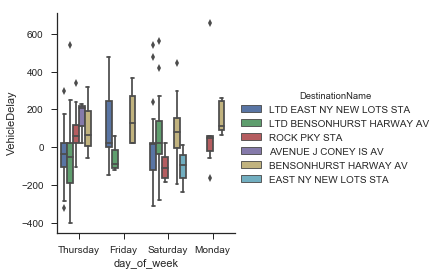

In [185]:
sns.factorplot(data=B6_NYCT4855,x='day_of_week',y='VehicleDelay',hue='',kind='box');
plt.show()

In [198]:
B6_NYCT4855.DestinationName.unique()

array(['LTD EAST NY NEW LOTS STA', 'LTD BENSONHURST HARWAY AV',
       'ROCK PKY STA', 'AVENUE J CONEY IS AV', 'BENSONHURST HARWAY AV',
       'EAST NY NEW LOTS STA'], dtype=object)

In [244]:
B6_NYCT4855_grp1 = B6_NYCT4855.groupby(['VehicleRef','OriginName','DestinationName','day_of_week','ScheduledArrivalTime'])['VehicleDelay'].max()

In [245]:
B6_NYCT4855_grp1

VehicleRef  OriginName                         DestinationName            day_of_week  ScheduledArrivalTime
NYCT_4855   AV J/CONEY ISLAND AV               ROCK PKY STA               Thursday     12:25:43               -103.000000
                                                                                       12:35:28                -88.000000
                                                                                       12:43:00                120.000000
                                                                                       12:54:40                 20.657459
            BEDFORD AV/CAMPUS ROAD             BENSONHURST HARWAY AV      Friday       15:55:00                240.000000
                                                                                       15:59:53                367.000000
                                                                                       16:09:31                 20.657459
                                      

In [237]:
B6_NYCT4855[(B6_NYCT4855.OriginName == 'HARWAY AV/BAY 37 ST')]

,RecordedAtTime,OriginName,DestinationName,VehicleRef,ExpectedArrivalTime,ScheduledArrivalTime,VehicleDelay,day_of_week,Weekend
16856,2017-06-01 06:13:00,HARWAY AV/BAY 37 ST,LTD EAST NY NEW LOTS STA,NYCT_4855,2017-06-01 06:13:00,6:11:04,116.000000,Thursday,False
18447,2017-06-01 06:24:00,HARWAY AV/BAY 37 ST,LTD EAST NY NEW LOTS STA,NYCT_4855,2017-06-01 06:24:00,6:24:18,-18.000000,Thursday,False
20201,2017-06-01 06:33:00,HARWAY AV/BAY 37 ST,LTD EAST NY NEW LOTS STA,NYCT_4855,2017-06-01 06:34:00,6:35:45,-105.000000,Thursday,False
22143,2017-06-01 06:43:00,HARWAY AV/BAY 37 ST,LTD EAST NY NEW LOTS STA,NYCT_4855,2017-06-01 06:44:00,6:45:00,-60.000000,Thursday,False
24285,2017-06-01 06:54:00,HARWAY AV/BAY 37 ST,LTD EAST NY NEW LOTS STA,NYCT_4855,2017-06-01 06:56:00,6:56:35,-35.000000,Thursday,False
26636,2017-06-01 07:03:00,HARWAY AV/BAY 37 ST,LTD EAST NY NEW LOTS STA,NYCT_4855,2017-06-01 07:03:00,7:03:12,-12.000000,Thursday,False
29201,2017-06-01 07:13:00,HARWAY AV/BAY 37 ST,LTD EAST NY NEW LOTS STA,NYCT_4855,2017-06-01 07:14:00,7:12:42,78.000000,Thursday,False
31890,2017-06-01 07:24:00,HARWAY AV/BAY 37 ST,LTD EAST NY NEW LOTS STA,NYCT_4855,2017-06-01 07:25:00,7:23:00,120.000000,Thursday,False
75948,2017-06-01 10:03:00,HARWAY AV/BAY 37 ST,ROCK PKY STA,NYCT_4855,2017-06-01 10:03:00,9:59:00,240.000000,Thursday,False
78092,2017-06-01 10:14:00,HARWAY AV/BAY 37 ST,ROCK PKY STA,NYCT_4855,2017-06-01 10:15:00,10:09:19,341.000000,Thursday,False


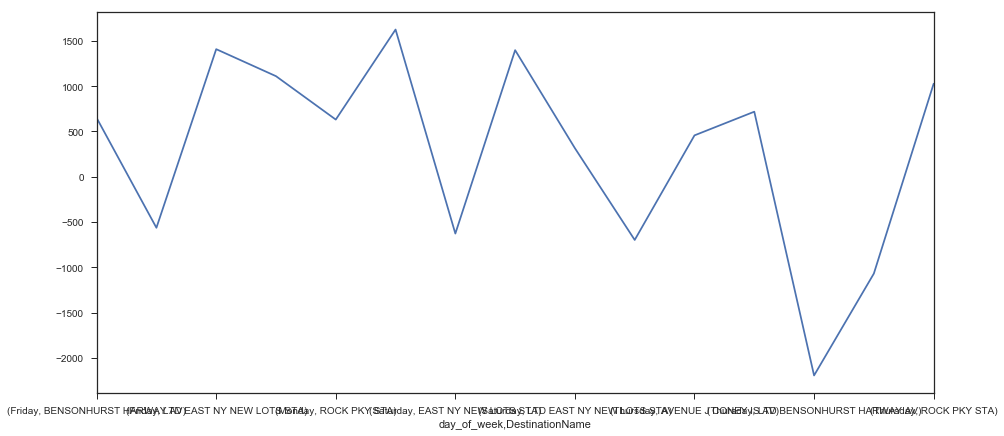

In [222]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
B6_NYCT4855.groupby(['day_of_week','DestinationName'])['VehicleDelay'].sum().plot(ax=ax);

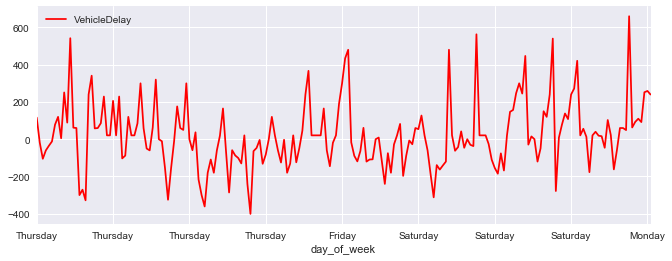

In [366]:
###### gca stands for 'get current axis'
ax = plt.gca()

#B6_NYCT4855.plot(kind='line',x='OriginName',y='VehicleDelay',ax=ax)
B6_NYCT4855.plot(kind='line',x=B6_NYCT4855.day_of_week,y='VehicleDelay', color='red', ax=ax)

plt.show()

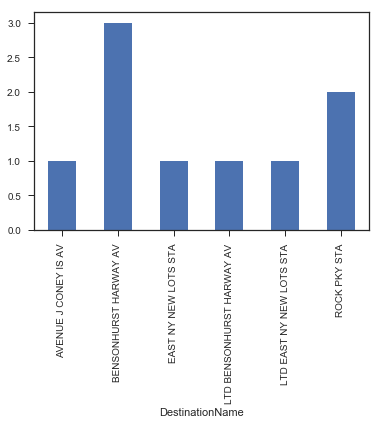

In [230]:
B6_NYCT4855.groupby('DestinationName')['OriginName'].nunique().plot(kind='bar')
plt.show()

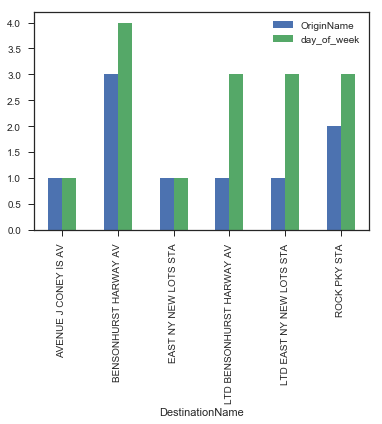

In [231]:
B6_NYCT4855.groupby('DestinationName')['OriginName','day_of_week'].nunique().plot(kind='bar')
plt.show()

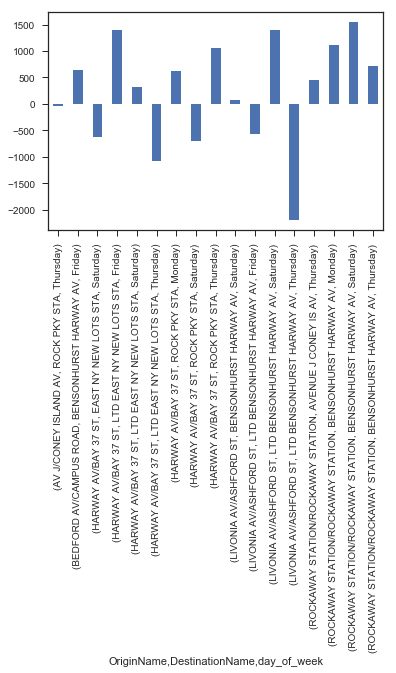

In [233]:
B6_NYCT4855.groupby(['OriginName','DestinationName','day_of_week'])['VehicleDelay'].sum().plot(kind='bar')
plt.show()

In [ ]:
## the fastest day to reach Liviona Av/Ashford St from LTD Bensonhurst Harway Av is on Thursday


In [267]:
B6_NYCT4855_grp2 = B6_NYCT4855.groupby(['OriginName','DestinationName','day_of_week'])['ScheduledArrivalTime','VehicleDelay'].max()

In [271]:
B6_NYCT4855_grp2.head(5)

VehicleDelay
OriginName             DestinationName          day_of_week              
AV J/CONEY ISLAND AV   ROCK PKY STA             Thursday            120.0
BEDFORD AV/CAMPUS ROAD BENSONHURST HARWAY AV    Friday              367.0
HARWAY AV/BAY 37 ST    EAST NY NEW LOTS STA     Saturday              9.0
                       LTD EAST NY NEW LOTS STA Friday              480.0
                                                Saturday            540.0

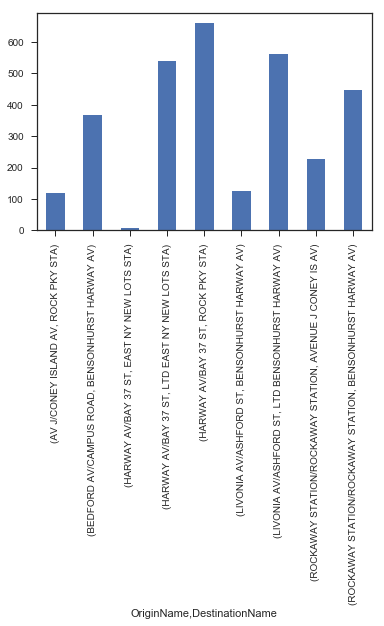

In [256]:
B6_NYCT4855.groupby(['OriginName','DestinationName'])['VehicleDelay'].max().plot(kind='bar')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BAAC592978>]], dtype=object)

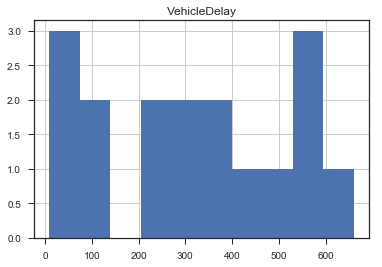

In [270]:
#df.reset_index().pivot('index','Letter','N').hist()
B6_NYCT4855_grp2.reset_index().hist()
#B6_NYCT4855.groupby(['OriginName','DestinationName','day_of_week'])['ScheduledArrivalTime','VehicleDelay'].max()


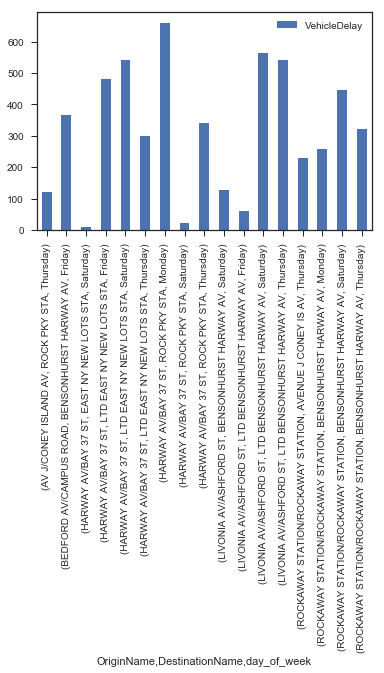

In [272]:
B6_NYCT4855_grp2.plot(kind='bar')

In [273]:
B6_NYCT4855.OriginName.unique()

array(['HARWAY AV/BAY 37 ST', 'LIVONIA AV/ASHFORD ST',
       'ROCKAWAY STATION/ROCKAWAY STATION', 'AV J/CONEY ISLAND AV',
       'BEDFORD AV/CAMPUS ROAD'], dtype=object)

In [274]:
B6_NYCT4855.DestinationName.unique()

array(['LTD EAST NY NEW LOTS STA', 'LTD BENSONHURST HARWAY AV',
       'ROCK PKY STA', 'AVENUE J CONEY IS AV', 'BENSONHURST HARWAY AV',
       'EAST NY NEW LOTS STA'], dtype=object)

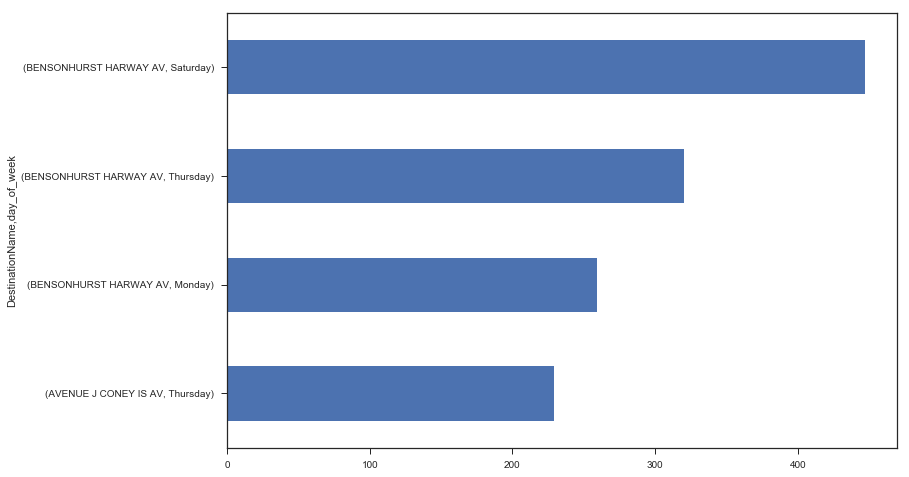

In [278]:
## If the Origin is "ROCKAWAY STATION/" and destination is "BENSONHURST HARWAY AV",
## the delay is more likely on Saturday than other days


B6_NYCT4855[
    B6_NYCT4855['OriginName'] == 'ROCKAWAY STATION/ROCKAWAY STATION'
].groupby(['DestinationName','day_of_week'])['VehicleDelay']\
       .max().sort_values().plot(
    kind='barh',
    figsize=(12,8)
);

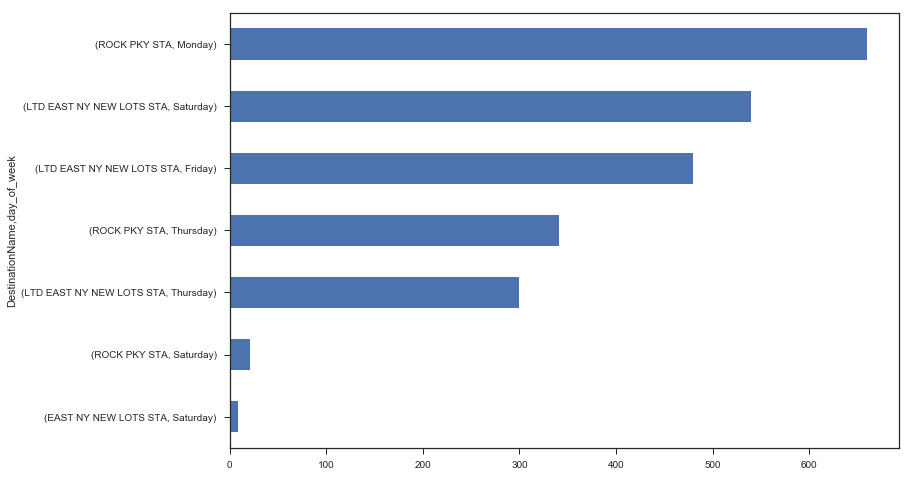

In [279]:
## if Origin is "HARWAY AV/BAY 37 ST" and destination is "ROCK PKY STA" then delay is likely to be more on Monday

## if Origin is "HARWAY AV/BAY 37 ST" and destination is "LTD EAST NY NEW LOTS STA" then delay is likely to be more on Saturday


B6_NYCT4855[
    B6_NYCT4855['OriginName'] == 'HARWAY AV/BAY 37 ST'
].groupby(['DestinationName','day_of_week'])['VehicleDelay']\
       .max().sort_values().plot(
    kind='barh',
    figsize=(12,8)
);

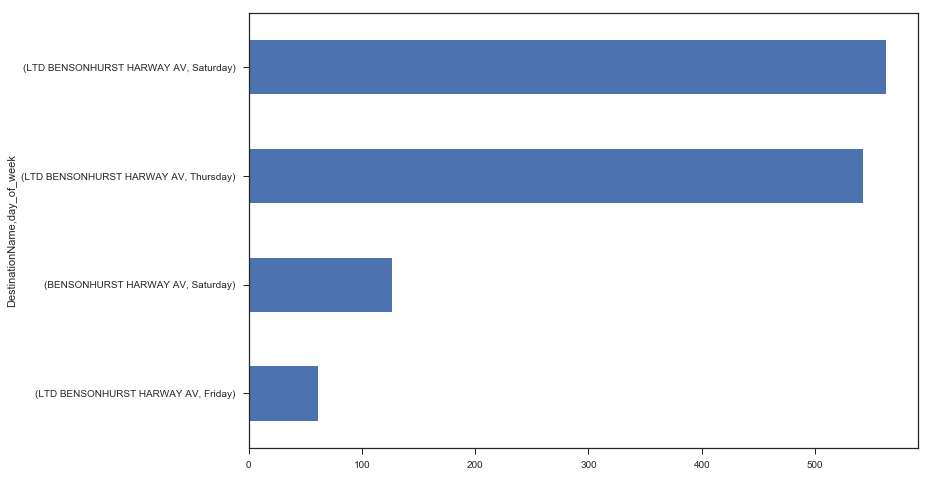

In [287]:
## if Origin is "LIVONIA AV/ASHFORD ST" and destination is "LTD BENSONHURST HARWAY AV" then delay is likely to be more on Saturday


B6_NYCT4855[
    B6_NYCT4855['OriginName'] == 'LIVONIA AV/ASHFORD ST'
].groupby(['DestinationName','day_of_week'])['VehicleDelay']\
       .max().sort_values().plot(
    kind='barh',
    figsize=(12,8)
);

### Time Series Analysis---------------

In [313]:
B6_NYCT4855.columns

Index(['RecordedAtTime', 'DirectionRef', 'PublishedLineName', 'OriginName',
       'OriginLat', 'OriginLong', 'DestinationName', 'DestinationLat',
       'DestinationLong', 'VehicleRef', 'VehicleLocation.Latitude',
       'VehicleLocation.Longitude', 'NextStopPointName',
       'ArrivalProximityText', 'DistanceFromStop', 'ExpectedArrivalTime',
       'ScheduledArrivalTime', 'VehicleDelay', 'day_of_week'],
      dtype='object')

In [339]:
B6_NYCT4855_timeseries =  B6_NYCT4855[['RecordedAtTime','VehicleDelay']]

In [340]:
B6_NYCT4855_timeseries.dtypes

RecordedAtTime    datetime64[ns]
VehicleDelay             float64
dtype: object

In [341]:
B6_NYCT4855_timeseries = B6_NYCT4855_timeseries.set_index('RecordedAtTime')
B6_NYCT4855_timeseries.head(4)

,VehicleDelay
RecordedAtTime,
2017-06-01 06:13:00,116.0
2017-06-01 06:24:00,-18.0
2017-06-01 06:33:00,-105.0
2017-06-01 06:43:00,-60.0


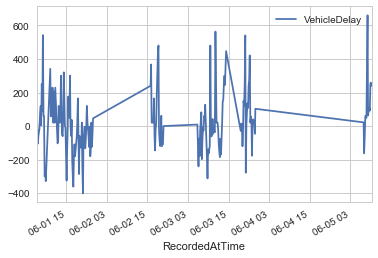

In [342]:
B6_NYCT4855_timeseries.plot(grid=True);

#### Note that in Time Series plots, time is usually plotted on the x-axis while the y-axis is usually the magnitude of the data.

In [348]:
B6_NYCT4855_timeseries.head(4)

,VehicleDelay,Year,Month,Weekday Name,WeekDate,Hours,Mins,Secs
RecordedAtTime,,,,,,,,
2017-06-01 06:13:00,116.0,2017,6,Thursday,2017-06-01,6,13,0
2017-06-01 06:24:00,-18.0,2017,6,Thursday,2017-06-01,6,24,0
2017-06-01 06:33:00,-105.0,2017,6,Thursday,2017-06-01,6,33,0
2017-06-01 06:43:00,-60.0,2017,6,Thursday,2017-06-01,6,43,0


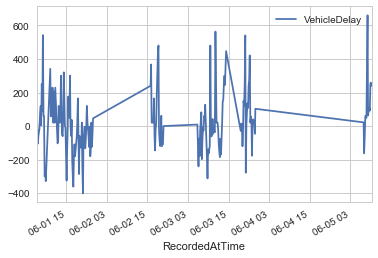

In [322]:
from datetime import datetime
start_date = datetime(2017,6,1)
end_date = datetime(2017,6,7)
B6_NYCT4855_timeseries[(start_date <= B6_NYCT4855_timeseries.index) & (B6_NYCT4855_timeseries.index <= end_date)].plot(grid=True)

In [324]:
import statsmodels.api as sm

ImportError: cannot import name 'unicode'

In [325]:
decomposition = sm.tsa.seasonal_decompse(B6_NYCT4855_timeseries,model='addictive')
fig = decomposition.plot()
matplotlib.rcParams['figure.figsize'] = [9.0,5.0]

NameError: name 'sm' is not defined

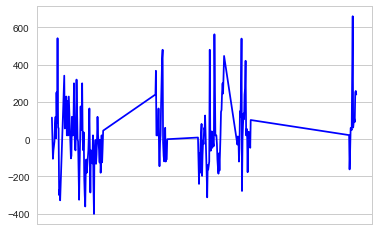

In [328]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(B6_NYCT4855_timeseries.index, B6_NYCT4855_timeseries['VehicleDelay'], c='blue')
#plt.plot(decomposition.trend.index, decomposition.trend, c='red')

In [343]:
B6_NYCT4855_timeseries['Year'] = B6_NYCT4855_timeseries.index.year
B6_NYCT4855_timeseries['Month'] = B6_NYCT4855_timeseries.index.month
B6_NYCT4855_timeseries['Weekday Name'] =B6_NYCT4855_timeseries.index.weekday_name

In [347]:
B6_NYCT4855_timeseries['WeekDate'] =B6_NYCT4855_timeseries.index.date
B6_NYCT4855_timeseries['Hours'] =B6_NYCT4855_timeseries.index.hour
B6_NYCT4855_timeseries['Mins'] =B6_NYCT4855_timeseries.index.minute
B6_NYCT4855_timeseries['Secs'] =B6_NYCT4855_timeseries.index.second

In [349]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

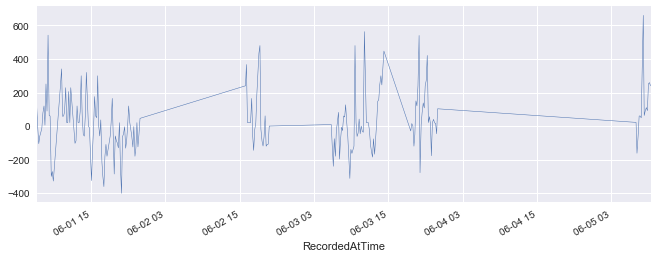

In [350]:
B6_NYCT4855_timeseries['VehicleDelay'].plot(linewidth=0.5);

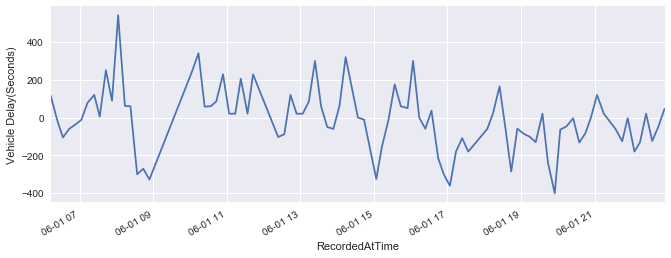

In [353]:
ax = B6_NYCT4855_timeseries.loc['2017-06-01', 'VehicleDelay'].plot()
ax.set_ylabel('Vehicle Delay(Seconds)');

## The rush hour is between 8- 9 am and it is likely to expect delays 

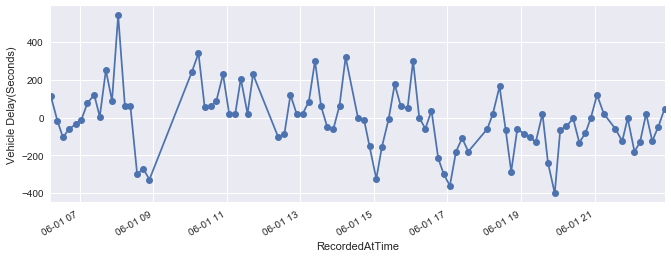

In [362]:
ax = B6_NYCT4855_timeseries.loc['2017-06-01':'2017-06-01', 'VehicleDelay'].plot(marker='o', linestyle='-')
ax.set_ylabel('Vehicle Delay(Seconds)');